In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score,roc_auc_score,roc_curve
import seaborn as sns

from sklearn import linear_model

from sklearn.model_selection import train_test_split

In [ ]:
pip install tensorflow scikit-learn


Note: you may need to restart the kernel to use updated packages.


### Building the DL model for feature extraction using ensembled model (resnet and densenet


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score,roc_auc_score,roc_curve

ensembled = 2 deep learnings

hybrid = 1dl + 1 ml

ensembled hybrid model (2deep learning + 1 machinelearning)

In [ ]:
from tensorflow.keras.applications import DenseNet121, ResNet50
from tensorflow.keras.applications.densenet import preprocess_input as densenet_preprocess
from tensorflow.keras.applications.resnet import preprocess_input as resnet_preprocess
from tensorflow.keras.layers import Input, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

input_densenet = Input(shape=(128, 128, 3), name="densenet_input")
input_resnet = Input(shape=(128, 128, 3), name="resnet_input")

densenet_base = DenseNet121(weights='imagenet', include_top=False)(input_densenet)
resnet_base = ResNet50(weights='imagenet', include_top=False)(input_resnet)

features_densenet = Flatten()(densenet_base)
features_resnet = Flatten()(resnet_base)

merged_features = Concatenate()([features_densenet, features_resnet])

feature_extractor = Model(inputs=[input_densenet, input_resnet], outputs=merged_features)



29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0)
    img_densenet = densenet_preprocess(img)
    img_resnet = resnet_preprocess(img)
    features = feature_extractor.predict([img_densenet, img_resnet])
    return features.flatten()

In [ ]:
def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = np.expand_dims(img, axis=0)
    img_densenet = densenet_preprocess(img)
    img_resnet = resnet_preprocess(img)
    features = feature_extractor.predict([img_densenet, img_resnet])
    return features.flatten()

dataset_path = '/kaggle/input/brain-tumor-mri-dataset/Training'
X, y = [], []

for class_folder in ['glioma', 'meningioma', 'notumor', 'pituitary']:
    class_path = os.path.join(dataset_path, class_folder)
    for root, _, files in os.walk(class_path):
        for file in files:
            img_path = os.path.join(root, file)
            label = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}[class_folder]

            features = extract_features(img_path)
            X.append(features)
            y.append(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━

In [ ]:
X

In [ ]:
y

In [ ]:
print(set(y))
print(len(set(y)))


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score,roc_auc_score,roc_curve


In [ ]:
len(X[0])

### Writing the data into a Excel file

In [ ]:
import csv

X = np.array(X)
y = np.array(y)

csv_file_path = 'new_features_Resenet.csv'
with open(csv_file_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)

    header = ['feature_' + str(i) for i in range(X.shape[1])]
    header.append('label')
    csv_writer.writerow(header)

    for i in range(X.shape[0]):
        row = list(X[i]) + [y[i]]
        csv_writer.writerow(row)

print(f"Features saved to {csv_file_path}")

### Training using the EXTRACTED FEATURES with ML models


In [ ]:
import pandas as pd

df1 = pd.read_csv("/kaggle/input/feature-extraction-resnet-densenet/new_features_Mix.csv")


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5712 entries, 0 to 5711
Columns: 49153 entries, feature_0 to label
dtypes: float64(49152), int64(1)
memory usage: 2.1 GB


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df1.drop(columns=['label'])
y = df1['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Model1 :- Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import time
start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
end_time = time.time()

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       288
           1       0.93      0.94      0.93       265
           2       0.97      0.99      0.98       291
           3       0.99      0.99      0.99       299

    accuracy                           0.97      1143
   macro avg       0.96      0.96      0.96      1143
weighted avg       0.97      0.97      0.97      1143

Computation Time: 41.4115 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Model 2 :- Random Forest Classifier**


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.metrics import classification_report

start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
end_time = time.time()

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       288
           1       0.84      0.81      0.82       265
           2       0.96      0.97      0.96       291
           3       0.89      0.98      0.93       299

    accuracy                           0.91      1143
   macro avg       0.91      0.91      0.91      1143
weighted avg       0.91      0.91      0.91      1143

Computation Time: 35.4049 seconds


# **Model 3 :- Decision Tree Classifier**


In [ ]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
end_time = time.time()

print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       288
           1       0.74      0.68      0.71       265
           2       0.85      0.94      0.90       291
           3       0.86      0.85      0.85       299

    accuracy                           0.82      1143
   macro avg       0.81      0.82      0.81      1143
weighted avg       0.82      0.82      0.82      1143

Computation Time: 151.6235 seconds


# **Model 4 :- Extra Trees Classifier**


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)
end_time = time.time()

print("Extra Trees Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Extra Trees Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       288
           1       0.86      0.83      0.84       265
           2       0.96      0.97      0.96       291
           3       0.89      0.98      0.93       299

    accuracy                           0.92      1143
   macro avg       0.92      0.91      0.91      1143
weighted avg       0.92      0.92      0.92      1143

Computation Time: 14.5306 seconds


# **Model 5 :- SVC**


In [ ]:
from sklearn.svm import SVC

start_time = time.time()
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
end_time = time.time()

print("Support Vector Machine Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       288
           1       0.84      0.89      0.87       265
           2       0.93      0.99      0.96       291
           3       0.96      0.96      0.96       299

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

Computation Time: 500.3682 seconds


# **Model 6 :- GaussianNB**


In [ ]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
end_time = time.time()

print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.69       288
           1       0.57      0.46      0.51       265
           2       0.83      0.88      0.86       291
           3       0.78      0.78      0.78       299

    accuracy                           0.72      1143
   macro avg       0.71      0.71      0.71      1143
weighted avg       0.71      0.72      0.71      1143

Computation Time: 5.2678 seconds


# **Model 7 :- KNeighborsClassifier**


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
end_time = time.time()

print("K-Nearest Neighbors Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       288
           1       0.88      0.74      0.81       265
           2       0.97      0.92      0.95       291
           3       0.92      0.98      0.95       299

    accuracy                           0.90      1143
   macro avg       0.90      0.90      0.90      1143
weighted avg       0.90      0.90      0.90      1143

Computation Time: 7.6433 seconds


# **Model 8 :- Linear Discriminant Analysis**


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start_time = time.time()
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
end_time = time.time()

print("Linear Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Linear Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65       288
           1       0.57      0.48      0.52       265
           2       0.72      0.86      0.78       291
           3       0.77      0.73      0.75       299

    accuracy                           0.68      1143
   macro avg       0.68      0.68      0.67      1143
weighted avg       0.68      0.68      0.68      1143

Computation Time: 453.6815 seconds


# **Model 9 :- MLPClassifier**


In [ ]:
from sklearn.neural_network import MLPClassifier

start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
end_time = time.time()

print("Multi-layer Perceptron Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Multi-layer Perceptron Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       288
           1       0.92      0.91      0.92       265
           2       0.97      0.99      0.98       291
           3       0.98      0.99      0.98       299

    accuracy                           0.96      1143
   macro avg       0.96      0.96      0.96      1143
weighted avg       0.96      0.96      0.96      1143

Computation Time: 93.6307 seconds


# **Model 10 :- QuadraticDiscriminantAnalysis**


In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

start_time = time.time()
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred = qda.predict(X_test)
end_time = time.time()

print("Quadratic Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Quadratic Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.95      0.43       288
           1       0.39      0.12      0.19       265
           2       1.00      0.18      0.31       291
           3       1.00      0.02      0.05       299

    accuracy                           0.32      1143
   macro avg       0.67      0.32      0.24      1143
weighted avg       0.68      0.32      0.24      1143

Computation Time: 46.4632 seconds


# **Model 11 :- Ada Boost Classifier**


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
end_time = time.time()

print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80       288
           1       0.59      0.76      0.67       265
           2       0.95      0.91      0.93       291
           3       0.91      0.84      0.87       299

    accuracy                           0.82      1143
   macro avg       0.83      0.81      0.82      1143
weighted avg       0.83      0.82      0.82      1143

Computation Time: 643.4726 seconds


# **Model 12 :- XGBClassifier**


In [ ]:
from xgboost import XGBClassifier
import time
start_time = time.time()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
end_time = time.time()

from sklearn.metrics import classification_report

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       288
           1       0.91      0.88      0.90       265
           2       0.97      0.99      0.98       291
           3       0.95      0.98      0.97       299

    accuracy                           0.95      1143
   macro avg       0.95      0.95      0.95      1143
weighted avg       0.95      0.95      0.95      1143

Computation Time: 1438.2275 seconds


# **Model 13 :- Ridge Classifier**


In [ ]:
from sklearn.linear_model import RidgeClassifier
import time
from sklearn.metrics import classification_report
start_time = time.time()
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
end_time = time.time()

print("Ridge Classifier Classification Report:\n", classification_report(y_test, y_pred))
print(f"Computation Time: {end_time - start_time:.4f} seconds")


Ridge Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       288
           1       0.93      0.93      0.93       265
           2       0.98      0.98      0.98       291
           3       0.98      1.00      0.99       299

    accuracy                           0.97      1143
   macro avg       0.96      0.96      0.96      1143
weighted avg       0.96      0.97      0.96      1143

Computation Time: 14.8955 seconds


# **Model Analysis using SHAP**


In [ ]:
import numpy as np
import shap

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

explainer = shap.Explainer(rf, X_train_scaled)
shap_values = explainer(X_test_scaled, check_additivity=False)  #


100%|===================| 4562/4572 [05:20<00:00]        


Top 2 Important Features:
Feature: feature_3072, SHAP Importance: 0.0016628978843758332
Feature: feature_151, SHAP Importance: 0.0017908298772273616
Feature: feature_6454, SHAP Importance: 0.0019566079268835677
Feature: feature_3560, SHAP Importance: 0.002008832040922826
Feature: feature_11398, SHAP Importance: 0.0020522401853368165
Feature: feature_29755, SHAP Importance: 0.002078172650910645
Feature: feature_23527, SHAP Importance: 0.002149299051134974
Feature: feature_3093, SHAP Importance: 0.0021754009393800656
Feature: feature_6428, SHAP Importance: 0.0021898875765106007
Feature: feature_3041, SHAP Importance: 0.0024034284994713944


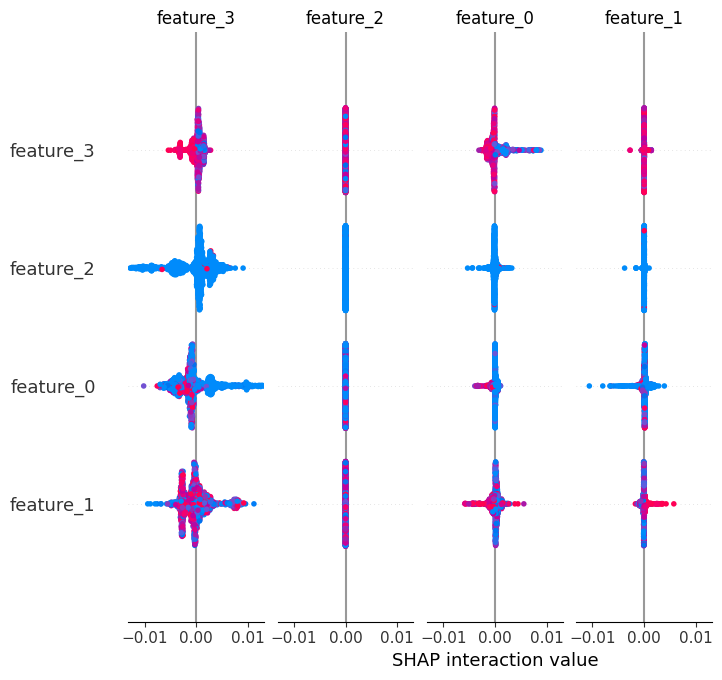

In [ ]:

if len(shap_values.values.shape) == 3:
    class_index = 0  #
    feature_importance = np.abs(shap_values.values[:, :, class_index]).mean(axis=0)
else:
    feature_importance = np.abs(shap_values.values).mean(axis=0)

top_2_indices = np.argsort(feature_importance)[-10:]
top_2_features = X.columns[top_2_indices]
top_2_importance = feature_importance[top_2_indices]

print("\nTop 2 Important Features:")
for feature, importance in zip(top_2_features, top_2_importance):
    print(f"Feature: {feature}, SHAP Importance: {importance}")

shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X.columns)




Top 2 Important Features:
Feature: feature_3041, SHAP Importance: 0.0011304973132877799
Feature: feature_3263, SHAP Importance: 0.001135946722663419
Feature: feature_3560, SHAP Importance: 0.001136691071365864
Feature: feature_11074, SHAP Importance: 0.0011747015896308023
Feature: feature_6436, SHAP Importance: 0.001212466596473653
Feature: feature_1708, SHAP Importance: 0.0013546004516035175
Feature: feature_2878, SHAP Importance: 0.0013859933317005237
Feature: feature_23527, SHAP Importance: 0.0015133415862573862
Feature: feature_567, SHAP Importance: 0.001536869155936581
Feature: feature_29755, SHAP Importance: 0.0019572645353827228


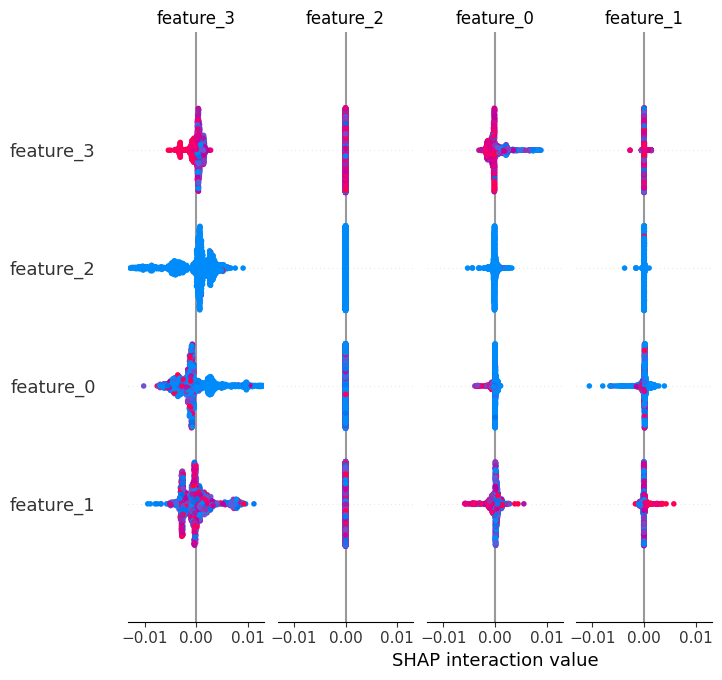

In [ ]:

if len(shap_values.values.shape) == 3:
    class_index = 1
    feature_importance = np.abs(shap_values.values[:, :, class_index]).mean(axis=0)
else:
    feature_importance = np.abs(shap_values.values).mean(axis=0)

top_2_indices = np.argsort(feature_importance)[-10:]
top_2_features = X.columns[top_2_indices]
top_2_importance = feature_importance[top_2_indices]

print("\nTop 2 Important Features:")
for feature, importance in zip(top_2_features, top_2_importance):
    print(f"Feature: {feature}, SHAP Importance: {importance}")

shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X.columns)



Top 2 Important Features:
Feature: feature_567, SHAP Importance: 0.0016159830510079714
Feature: feature_11101, SHAP Importance: 0.001735292776028523
Feature: feature_27933, SHAP Importance: 0.0019195429038109824
Feature: feature_23527, SHAP Importance: 0.0021162789918132492
Feature: feature_6922, SHAP Importance: 0.002220510848938097
Feature: feature_15867, SHAP Importance: 0.0022594584448447047
Feature: feature_1583, SHAP Importance: 0.0023179404309261035
Feature: feature_10433, SHAP Importance: 0.0023306657152574522
Feature: feature_7684, SHAP Importance: 0.0028901024857088523
Feature: feature_2878, SHAP Importance: 0.0029156972921926165


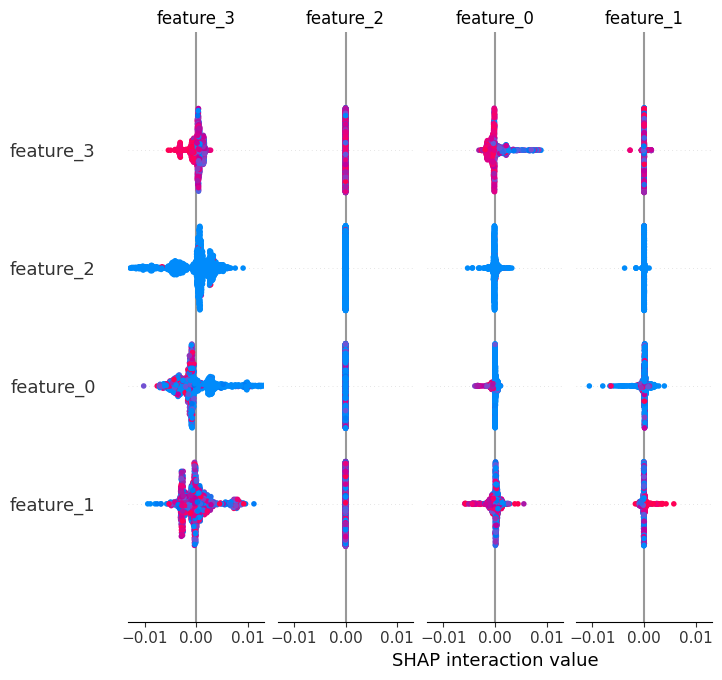

In [ ]:

if len(shap_values.values.shape) == 3:
    class_index = 2
    feature_importance = np.abs(shap_values.values[:, :, class_index]).mean(axis=0)
else:
    feature_importance = np.abs(shap_values.values).mean(axis=0)

top_2_indices = np.argsort(feature_importance)[-10:]
top_2_features = X.columns[top_2_indices]
top_2_importance = feature_importance[top_2_indices]

print("\nTop 2 Important Features:")
for feature, importance in zip(top_2_features, top_2_importance):
    print(f"Feature: {feature}, SHAP Importance: {importance}")

shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X.columns)




Top 2 Important Features:
Feature: feature_3263, SHAP Importance: 0.001579970851865262
Feature: feature_3560, SHAP Importance: 0.0016355505987728175
Feature: feature_3288, SHAP Importance: 0.0016807785685797841
Feature: feature_3093, SHAP Importance: 0.001735896206774441
Feature: feature_437, SHAP Importance: 0.0017705991951669062
Feature: feature_4414, SHAP Importance: 0.0018646691209319888
Feature: feature_7194, SHAP Importance: 0.0018807784488112406
Feature: feature_151, SHAP Importance: 0.0019171621289535085
Feature: feature_3041, SHAP Importance: 0.002664545762161947
Feature: feature_7193, SHAP Importance: 0.002719106296386613


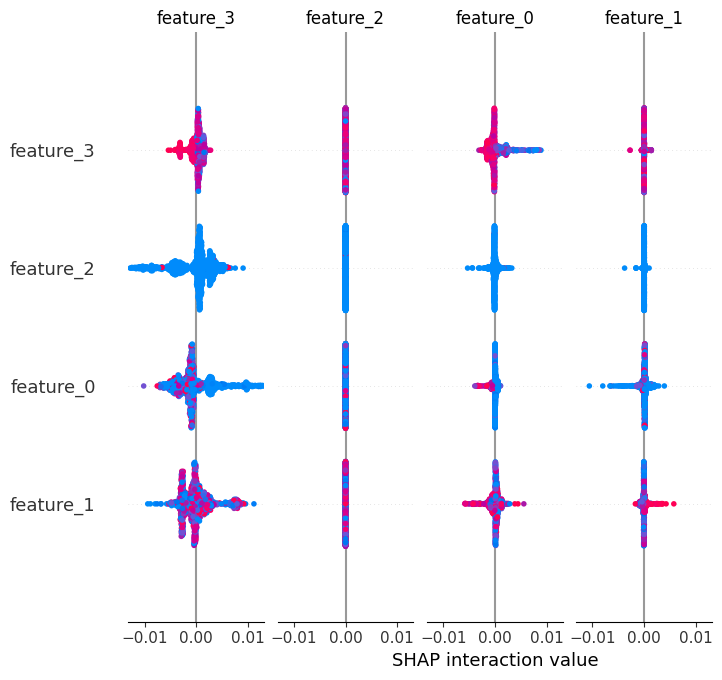

In [ ]:

if len(shap_values.values.shape) == 3:
    class_index = 3
    feature_importance = np.abs(shap_values.values[:, :, class_index]).mean(axis=0)
else:
    feature_importance = np.abs(shap_values.values).mean(axis=0)

top_2_indices = np.argsort(feature_importance)[-10:]
top_2_features = X.columns[top_2_indices]
top_2_importance = feature_importance[top_2_indices]

print("\nTop 2 Important Features:")
for feature, importance in zip(top_2_features, top_2_importance):
    print(f"Feature: {feature}, SHAP Importance: {importance}")

shap.summary_plot(shap_values, X_test_scaled, plot_type="bar", feature_names=X.columns)



In [ ]:
import cv2
import numpy as np
from sklearn.metrics import classification_report

label_map = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}

def predict_image(img_path):
    features = extract_features(img_path)
    prediction = ridge.predict(features.reshape(1, -1))
    predicted_label = label_map[prediction[0]]
    return predicted_label

img_path = "/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-glTr_0000.jpg"
predicted_class = predict_image(img_path)
print(f"Predicted Tumor Type: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Tumor Type: glioma
